In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import datetime as dt


In [2]:
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2025, 10, 19)

df = yf.download('AAPL', start=start, end=end)
print(df.head())

/tmp/ipython-input-2906663822.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2014-01-02  17.173336  17.294422  17.138874  17.252508  234684800
2014-01-03  16.796101  17.191024  16.779024  17.164946  392467600
2014-01-06  16.887701  16.976807  16.566979  16.686513  412610800
2014-01-07  16.766916  16.950717  16.701096  16.899799  317209200
2014-01-08  16.873104  16.938303  16.725008  16.728732  258529600


In [3]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.173336,17.294422,17.138874,17.252508,234684800
2014-01-03,16.796101,17.191024,16.779024,17.164946,392467600
2014-01-06,16.887701,16.976807,16.566979,16.686513,412610800
2014-01-07,16.766916,16.950717,16.701096,16.899799,317209200
2014-01-08,16.873104,16.938303,16.725008,16.728732,258529600
...,...,...,...,...,...
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900
2025-10-14,247.770004,248.850006,244.699997,246.600006,35478000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2967 entries, 2014-01-02 to 2025-10-17
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2967 non-null   float64
 1   (High, AAPL)    2967 non-null   float64
 2   (Low, AAPL)     2967 non-null   float64
 3   (Open, AAPL)    2967 non-null   float64
 4   (Volume, AAPL)  2967 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 139.1 KB


In [ ]:
df.shape

(4248, 5)

In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900
2025-10-14,247.770004,248.850006,244.699997,246.600006,35478000
2025-10-15,249.339996,251.820007,247.470001,249.490005,33893600
2025-10-16,247.449997,249.039993,245.130005,248.250000,39777000
2025-10-17,252.289993,253.380005,247.270004,248.020004,49147000


In [10]:
df = df.reset_index()

In [11]:
df = df.drop(['Date'], axis = 1)
df.head()

/tmp/ipython-input-3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,17.173336,17.294422,17.138874,17.252508,234684800
1,16.796101,17.191024,16.779024,17.164946,392467600
2,16.887701,16.976807,16.566979,16.686513,412610800
3,16.766916,16.950717,16.701096,16.899799,317209200
4,16.873104,16.938303,16.725008,16.728732,258529600


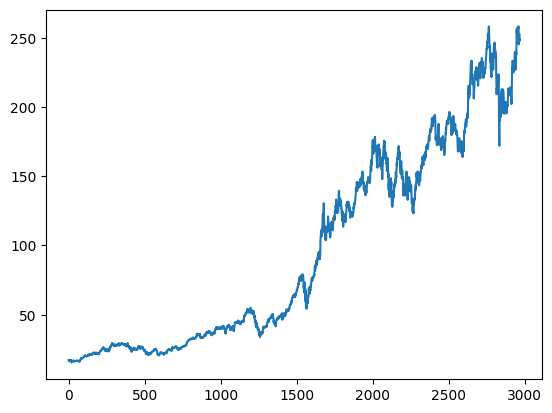

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()

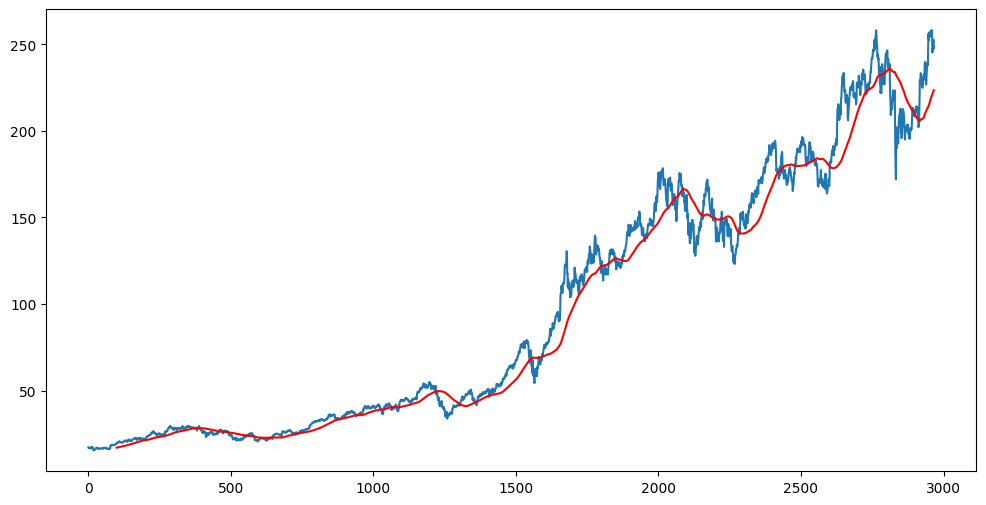

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
data_training_array = scaler.fit_transform(data_training)

In [28]:
x_train =[]
y_train =[]
for i in range(100, data_training_array.shape[0]):
     x_train.append(data_training_array[i-100:i, 0])
     y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [29]:
# x_train shape: (num_samples, timesteps)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [32]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [33]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 4078933.0000
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0363
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 0.0297
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0180
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0160
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0097
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0088
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0073
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0058
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0062
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0049
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0042
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0037
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0040
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - los

In [35]:
past_100_days = data_training.tail(100)

In [37]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

input_data = scaler.fit_transform(final_df)

In [38]:

x_test =[]
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(891, 100, 1)
(891,)


In [40]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [41]:
y_predicted = model.predict(x_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [42]:
scaler = scaler.scale_
scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor



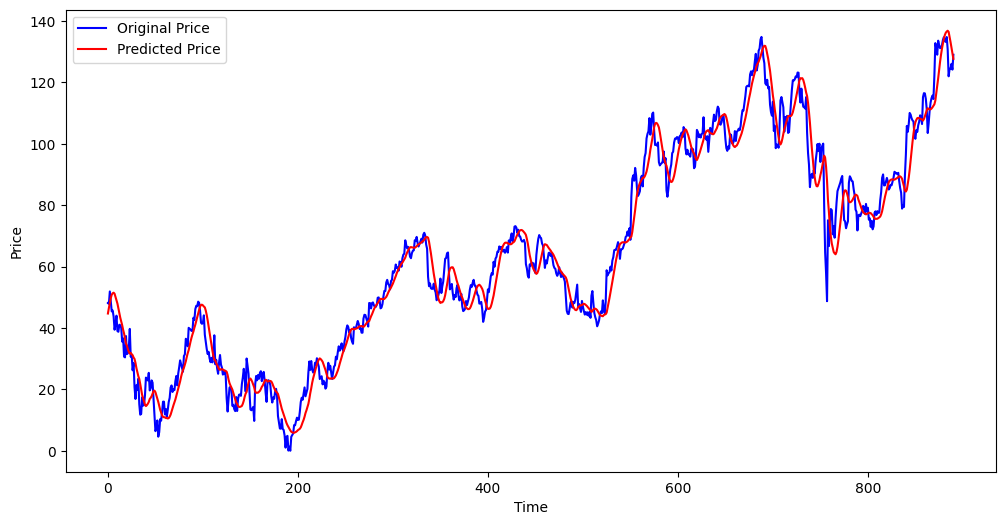

In [45]:
#predictions

fig2 = plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
